Gilang Abimanyu - A11.2019.11753

Import library

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Import datasets

In [92]:
dataset = pd.read_csv('DataSph.csv')
x=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,-1].values

In [93]:
print(x)

[[ 464    1]
 [ 464    1]
 [ 464    1]
 [ 606    1]
 [ 310    1]
 [ 620    1]
 [ 300    1]
 [ 500    1]
 [ 500    1]
 [ 330    1]
 [ 500    1]
 [ 200    1]
 [ 700    1]
 [ 600    1]
 [ 400    1]
 [ 950    1]
 [1250    1]
 [ 700    1]
 [ 900    1]
 [ 900    1]
 [1100    1]
 [ 860    1]
 [ 600    1]
 [1570    1]
 [ 250    1]
 [ 210    1]
 [ 220    1]
 [ 680    1]
 [ 550    1]
 [2000    1]
 [1000    1]
 [1000    1]
 [ 700    1]
 [ 800    1]
 [ 900    1]
 [ 950    1]
 [ 950    1]
 [ 800    1]]


In [94]:
print(y)

[ 3  4  4  4  5  1 12  1  1  1 12  1 12  0 12  0  0 12  0  0  0 12 12  0
  1  1  1  1 12  1 12 12 12 12 12 12 12 12]


Splitting the dataset into the Training set and Test set

In [95]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

Feature Scalling

In [96]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [97]:
print(x_train)

[[ 1.10661599  0.        ]
 [ 0.3939838   0.        ]
 [ 0.0376677   0.        ]
 [ 0.3939838   0.        ]
 [ 0.92845795  0.        ]
 [ 1.10661599  0.        ]
 [ 0.7502999   0.        ]
 [-0.67496449  0.        ]
 [-0.3186484   0.        ]
 [-0.24738518  0.        ]
 [ 0.0376677   0.        ]
 [-1.03128059  0.        ]
 [-0.67496449  0.        ]
 [-0.49680644  0.        ]
 [-0.80323829  0.        ]
 [ 0.0376677   0.        ]
 [-0.03359552  0.        ]
 [-1.56575474  0.        ]
 [-1.38759669  0.        ]
 [ 3.13761775  0.        ]
 [-1.35196508  0.        ]
 [ 0.7502999   0.        ]
 [ 0.60777346  0.        ]
 [ 0.7502999   0.        ]
 [-1.28070186  0.        ]
 [ 0.92845795  0.        ]
 [-0.29726943  0.        ]
 [-0.80323829  0.        ]]


In [98]:
print(x_test)

[[-0.27200562  0.        ]
 [ 2.2769092   0.        ]
 [ 0.91141911  0.        ]
 [ 0.36522308  0.        ]
 [-1.000267    0.        ]
 [ 0.6383211   0.        ]
 [-0.96385393  0.        ]
 [-0.45407097  0.        ]
 [-0.98206047  0.        ]
 [-0.51961449  0.        ]]


Training the K-NN model on the Training set

In [99]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric= 'minkowski', p=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

Predicting the Test set Results

In [100]:
y_pred = classifier.predict(x_test)

In [101]:
print(y_pred)

[ 1 12 12 12  1 12  1  1  1  1]


Making the Confusion Matrix

In [102]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [103]:
print(cm)

[[0 0 0 3]
 [0 3 0 1]
 [0 1 0 0]
 [0 2 0 0]]


Visualising the Training Set Results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

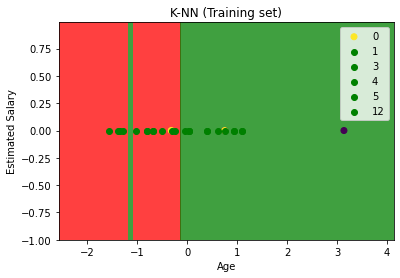

In [104]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


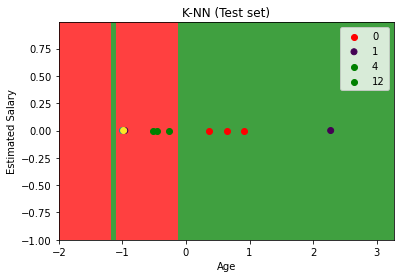

In [105]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()